<a href="https://colab.research.google.com/github/Siddhant24/board-snapper/blob/master/Board_Snapper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import math
import os
import keras
import pandas as pd
from keras.models import Sequential, Model
from keras.layers import Input, Dense, Conv2D, Conv3D, TimeDistributed, Dropout, Flatten, MaxPooling2D, MaxPool3D, Reshape, LSTM, Bidirectional
from keras import regularizers

#!rm board-snapper -r
# !git clone https://github.com/Siddhant24/board-snapper
# !pip install keras-metrics
import keras_metrics

Using TensorFlow backend.


In [0]:
def load_data(x_folder,y_folder,start=1,end = 50):
    x_data=[];
    x_paths=[];
    y_data=None;
    for i in range(start,end):
        src='lec'+str(i);
        image_folder=x_folder+src;
        #for img in sorted(os.listdir(image_folder)):
        for j in range(1, len(os.listdir(image_folder)) + 1):
            img = 'slide'+str(j)+'.jpg'
            image=cv2.resize(cv2.imread(os.path.join(image_folder,img)),(224,224));
            x_data.append(image);
            x_paths.append(str(os.path.join(image_folder,img)));
        print(y_folder+src+'.csv')
        label=np.array(np.loadtxt(y_folder+src+'.csv',dtype = int));
        y_data = np.concatenate([y_data, label]) if y_data is not None else label;
        print(src+"loaded");

    return np.array(x_data),np.array(y_data),x_paths;

In [0]:
def format_data(in_x,in_y,index,timestep,batch_size):
    total_samples=in_x.shape[0];
    dim=(batch_size,timestep,in_x.shape[1],in_x.shape[2],in_x.shape[3])
    
    x_train=np.zeros(batch_size*timestep*in_x.shape[1]*in_x.shape[2]*in_x.shape[3]).reshape(*dim);
    y_train=np.zeros(batch_size);
    
    offset=int(timestep/2);
    for i in range(dim[0]):
        x_train[i]=in_x[i+(index*batch_size):i+(index*batch_size)+timestep];
        y_train[i]=in_y[i+(index*batch_size)+offset];
    return x_train,y_train;

In [4]:
def getmodel(timesteps):
    model=Sequential();
    model.add(TimeDistributed(Conv2D(32, (3, 3), activation='relu'),input_shape=(timesteps,224, 224, 3)));
    model.add(TimeDistributed(MaxPooling2D(pool_size=(2, 2))));
    model.add(TimeDistributed(Conv2D(32, (3, 3),activation='relu',kernel_regularizer = regularizers.l2('0.5'))));
    model.add(TimeDistributed(MaxPooling2D(pool_size=(2, 2))))
    model.add(TimeDistributed(Conv2D(32, (3, 3),activation='relu',kernel_regularizer = regularizers.l2('0.5'))));
    model.add(TimeDistributed(MaxPooling2D(pool_size=(2, 2))))
    model.add(TimeDistributed(Conv2D(32, (3, 3),activation='relu',kernel_regularizer = regularizers.l2('0.5'))));
    model.add(TimeDistributed(MaxPooling2D(pool_size=(2, 2))))
    model.add(TimeDistributed(Conv2D(32, (3, 3),activation='relu',kernel_regularizer = regularizers.l2('0.5'))));
    model.add(TimeDistributed(MaxPooling2D(pool_size=(2, 2))));
    model.add(TimeDistributed(Flatten()));
    model.add(Bidirectional(LSTM(32,activation='tanh',return_sequences=False, kernel_regularizer=regularizers.l2('0.5')),merge_mode='concat'));
    model.add(Dense(1,activation='sigmoid'));
    model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy', keras_metrics.precision(), keras_metrics.recall()]);
    model.summary();
    return model;

timesteps=20;
lrcn=getmodel(timesteps);


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed_1 (TimeDist (None, 20, 222, 222, 32)  896       
_________________________________________________________________
time_distributed_2 (TimeDist (None, 20, 111, 111, 32)  0         
_________________________________________________________________
time_distributed_3 (TimeDist (None, 20, 109, 109, 32)  9248      
_________________________________________________________________
time_distributed_4 (TimeDist (None, 20, 54, 54, 32)    0         
_________________________________________________________________
time_distributed_5 (TimeDist (None, 20, 52, 52, 32)    9248      
_________________________________________________________________
time_distributed_6 (TimeDist (None, 20, 26, 26, 32)    0         
_________________________________________________________________
time_distributed_7 (TimeDist (None, 20, 24, 24, 32)    9248      
__________

In [5]:
x_folder='board-snapper/slides/';
y_folder='board-snapper/labels/';
print("loading data");
x_data,y_data,x_paths=load_data(x_folder,y_folder, 21, 50);
x_data = x_data[...,::-1]; ## BGR to RGB
print("data loaded");

loading data
board-snapper/labels/lec21.csv
lec21loaded
board-snapper/labels/lec22.csv
lec22loaded
board-snapper/labels/lec23.csv
lec23loaded
board-snapper/labels/lec24.csv
lec24loaded
board-snapper/labels/lec25.csv
lec25loaded
board-snapper/labels/lec26.csv
lec26loaded
board-snapper/labels/lec27.csv
lec27loaded
board-snapper/labels/lec28.csv
lec28loaded
board-snapper/labels/lec29.csv
lec29loaded
board-snapper/labels/lec30.csv
lec30loaded
board-snapper/labels/lec31.csv
lec31loaded
board-snapper/labels/lec32.csv
lec32loaded
board-snapper/labels/lec33.csv
lec33loaded
board-snapper/labels/lec34.csv
lec34loaded
board-snapper/labels/lec35.csv
lec35loaded
board-snapper/labels/lec36.csv
lec36loaded
board-snapper/labels/lec37.csv
lec37loaded
board-snapper/labels/lec38.csv
lec38loaded
board-snapper/labels/lec39.csv
lec39loaded
board-snapper/labels/lec40.csv
lec40loaded
board-snapper/labels/lec41.csv
lec41loaded
board-snapper/labels/lec42.csv
lec42loaded
board-snapper/labels/lec43.csv
lec43loade

In [7]:
timesteps=20;
lrcn=getmodel(timesteps);
total_samples=x_data.shape[0];
iter=total_samples-timesteps;
batch_size=16;

print("No. of samples: ", total_samples)
print("No. of batches: ", int(iter/batch_size))


epochs=1;
for e in range(epochs):
    for i in range(int(iter/batch_size)):
        x_train, y_train= format_data(x_data,y_data,i,timesteps,batch_size);
        print('training on batch '+str(i)+' for epoch number '+str(e))
        loss = lrcn.train_on_batch(x_train,y_train);
        print(loss)



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed_12 (TimeDis (None, 20, 222, 222, 32)  896       
_________________________________________________________________
time_distributed_13 (TimeDis (None, 20, 111, 111, 32)  0         
_________________________________________________________________
time_distributed_14 (TimeDis (None, 20, 109, 109, 32)  9248      
_________________________________________________________________
time_distributed_15 (TimeDis (None, 20, 54, 54, 32)    0         
_________________________________________________________________
time_distributed_16 (TimeDis (None, 20, 52, 52, 32)    9248      
_________________________________________________________________
time_distributed_17 (TimeDis (None, 20, 26, 26, 32)    0         
_________________________________________________________________
time_distributed_18 (TimeDis (None, 20, 24, 24, 32)    9248      
__________

In [0]:
lrcn.save("trained on 21-50")
# x_t,y_t,x_tpaths=load_data(x_folder,y_folder,50,51);
#x_test,y_test=format_data(x_t, y_t, 1 ,timesteps, y_t.shape[0] - timesteps - 10);
#y_pred=lrcn.predict(x_test,batch_size=batch_size);


#np.savetxt('y.csv',y_pred,delimiter=',',fmt='%.6f')
#print(y_pred);


In [0]:
x_test,y_test=format_data(x_t, y_t, 1 ,timesteps, 500);
y_pred=lrcn.predict(x_test,batch_size=batch_size);

In [0]:
print(y_pred.max())

0.050530244


In [0]:

for i in range(43):
    print(i)
    plt.imshow(x_data[y_data==1][i])
    plt.show()

In [0]:
np.where(y_data==1)

(array([ 26,  38,  73, 139, 143, 186, 193, 197, 204, 211, 267, 275, 288,
        303, 316, 363, 365, 386, 390, 446, 447, 455, 457, 485, 511, 531,
        547, 562, 573, 574, 577, 618, 620, 624, 634, 727, 738, 741, 783,
        786, 792, 818, 846]),)

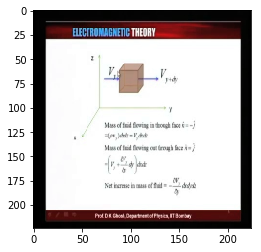

In [0]:
np.where(y_data==1)

(array([  26,   38,   73,  139,  143,  186,  193,  197,  204,  211,  267,
         275,  288,  303,  316,  363,  365,  386,  390,  446,  447,  455,
         457,  485,  511,  531,  547,  562,  573,  574,  577,  618,  620,
         624,  634,  727,  738,  741,  783,  786,  792,  818,  846,  899,
         902,  903,  972,  983,  984, 1055, 1059, 1108, 1146, 1149, 1158,
        1161, 1257, 1342, 1357, 1359, 1400, 1403, 1419, 1420, 1422, 1436,
        1437, 1508, 1570, 1573, 1645, 1670, 1672, 1676, 1689, 1719, 1763,
        1809, 1811, 1860, 1864, 1938, 1970, 1973, 2037, 2040, 2060, 2109,
        2115, 2176, 2181, 2267, 2269, 2389, 2391, 2393, 2408, 2411, 2414,
        2420, 2492, 2496, 2548, 2561, 2635, 2699, 2702, 2705, 2709, 2719,
        2736, 2749, 2761, 2791, 2809, 2823, 2832, 2843, 2852, 2854, 2887,
        2899, 2931, 2943, 2961, 2971, 2984, 2988, 2993, 2999, 3014, 3017,
        3041, 3053, 3066, 3095, 3105, 3159, 3191, 3220, 3221, 3225, 3231,
        3241, 3242, 3252, 3264, 3272, 

In [0]:
os.listdir('board-snapper/labels')

In [0]:
np.zeros((1,2,3,4,5)).shape

(1, 2, 3, 4, 5)

In [0]:
os.listdir('board-snapper')

['convLstmbatch.py',
 'labels',
 '.ipynb_checkpoints',
 '.DS_Store',
 'Board Snapper.ipynb',
 'slides',
 '.git']

In [0]:
label=np.array(pd.read_csv(('')));

board-snapper  sample_data


In [0]:
import pandas as pd
np.array(pd.read_csv("board-snapper/labels/lec26.csv"))

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
    

In [0]:
y_data.shape

(847,)

Cloning into 'board-snapper'...
remote: Enumerating objects: 39594, done.
remote: Counting objects: 100% (39594/39594), done.
remote: Compressing objects: 100% (39533/39533), done.
remote: Total 39594 (delta 61), reused 39594 (delta 61), pack-reused 0
Receiving objects: 100% (39594/39594), 1.05 GiB | 13.83 MiB/s, done.
Resolving deltas: 100% (61/61), done.
Checking out files: 100% (40976/40976), done.
